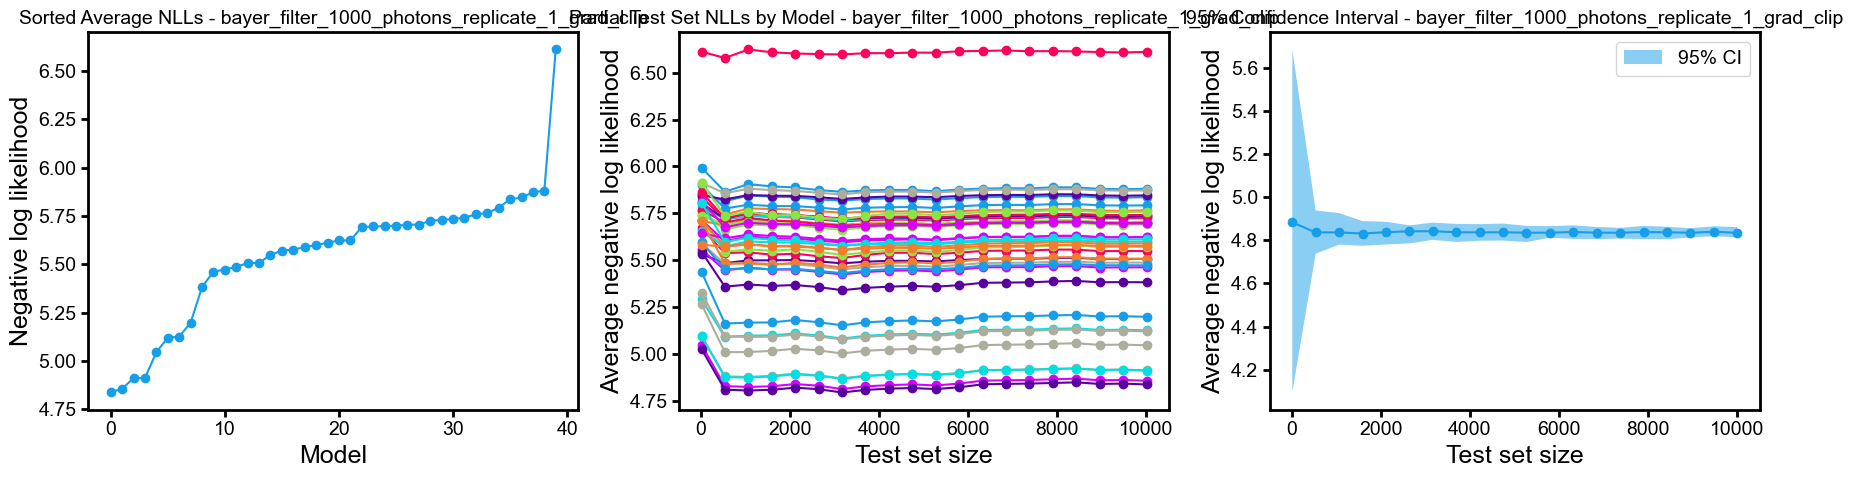

Results for bayer_filter_1000_photons_replicate_1_grad_clip:
Mutual information: 1.2192 bits
Lower bound: 1.1763 bits
Upper bound: 1.2550 bits
Confidence interval: 0.0787 bits




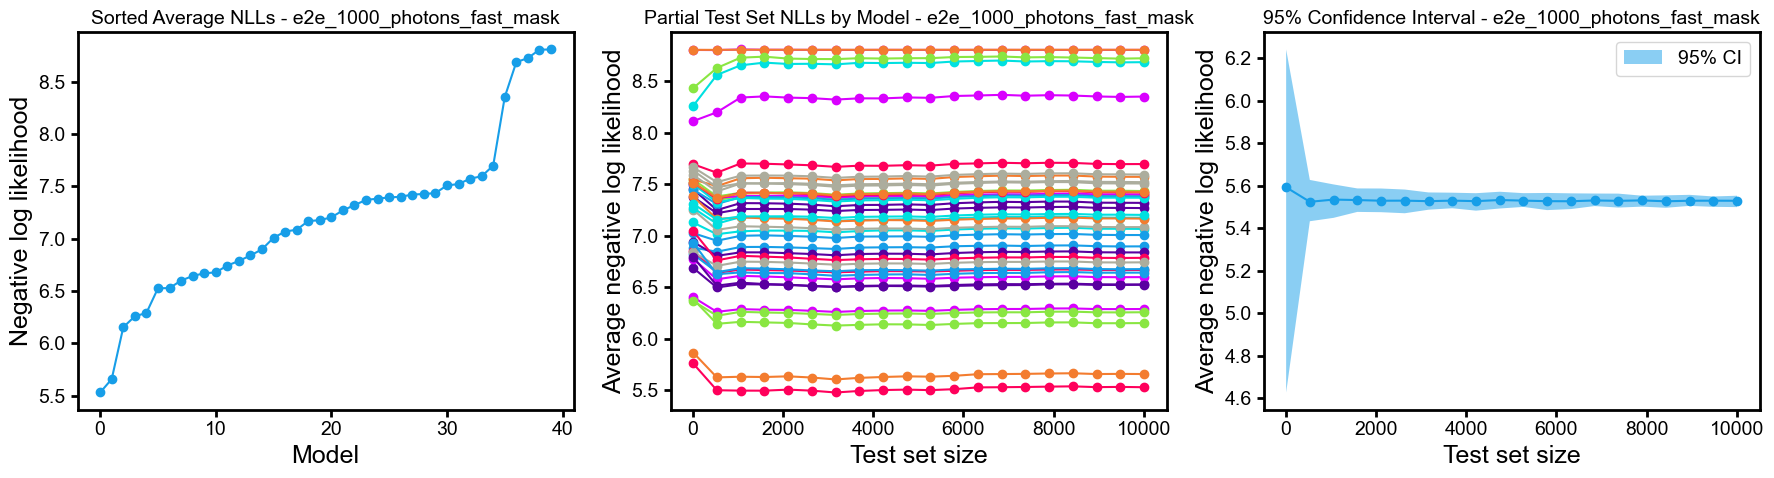

Results for e2e_1000_photons_fast_mask:
Mutual information: 1.7802 bits
Lower bound: 1.7446 bits
Upper bound: 1.8194 bits
Confidence interval: 0.0747 bits




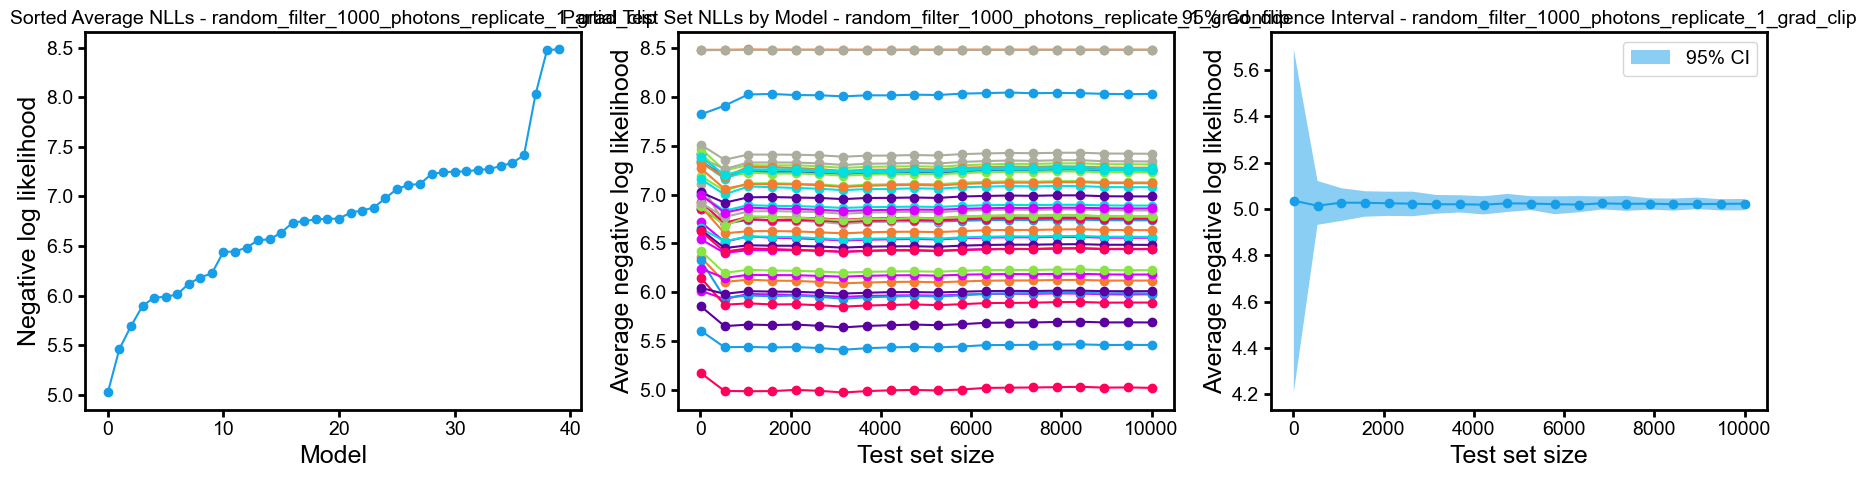

Results for random_filter_1000_photons_replicate_1_grad_clip:
Mutual information: 1.3588 bits
Lower bound: 1.3243 bits
Upper bound: 1.3959 bits
Confidence interval: 0.0716 bits




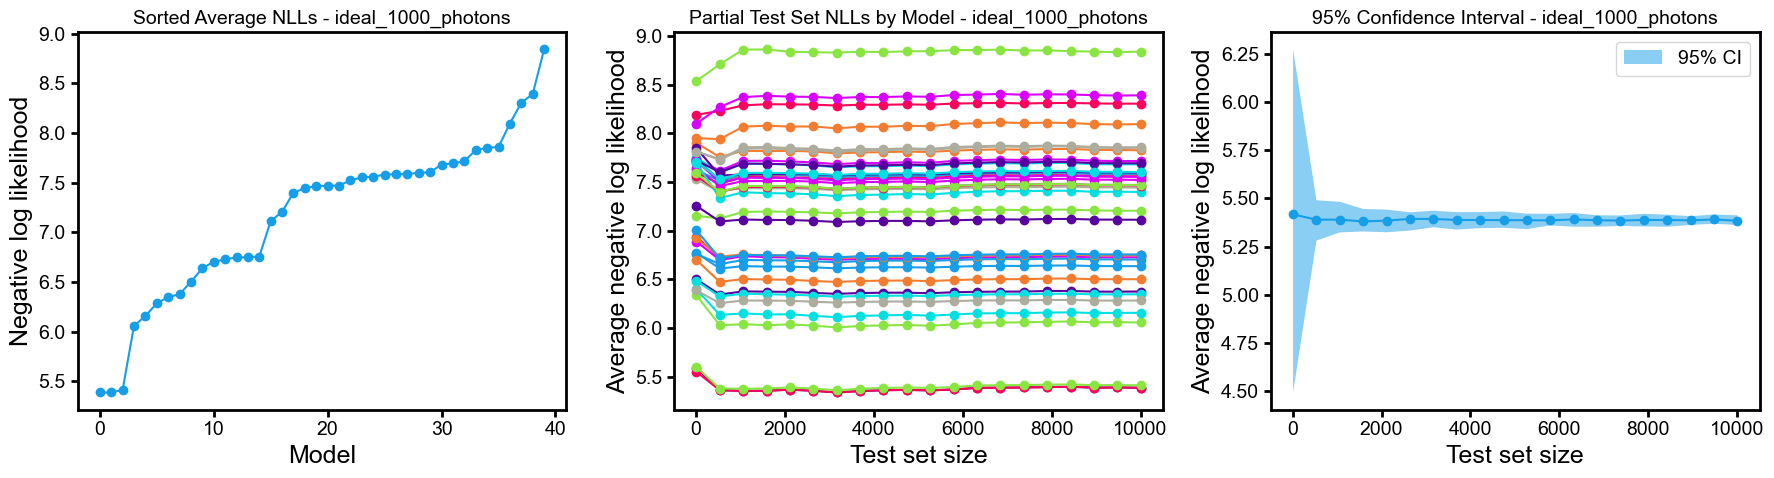

Results for ideal_1000_photons:
Mutual information: 1.6699 bits
Lower bound: 1.6238 bits
Upper bound: 1.7068 bits
Confidence interval: 0.0830 bits




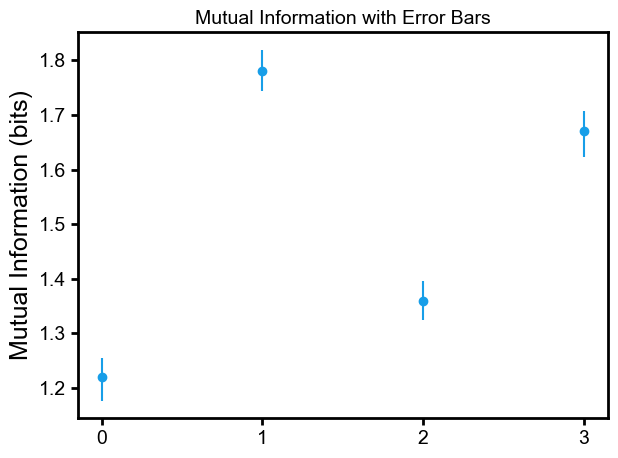

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cleanplots import *
import glob


# List of results files
# results_files = glob.glob('/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/mi_results/*.npz')
results_files = ['/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/mi_results/bayer_filter_1000_photons_replicate_1_grad_clip.npz',
                 '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/mi_results/e2e_1000_photons_fast_mask.npz',
                 '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/mi_results/random_filter_1000_photons_replicate_1_grad_clip.npz',
                 '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/mi_results/ideal_1000_photons.npz'

                 ]
# remove any file containing 'lcfa'
# results_files = [file for file in results_files if 'lcfa' not in file]
# results_files.sort()

# List to hold data from each results file
results_list = []

# Labels for the results files
labels = []

for file in results_files:
    # Load results from file
    results = np.load(file)
    data = {}
    data['average_nlls'] = results['average_nlls']
    data['partial_test_set_nlls_by_model'] = results['partial_test_set_nlls_by_model']
    data['test_set_sizes'] = results['test_set_sizes']
    data['mean_nll_dist_by_size'] = results['mean_nll_dist_by_size']
    data['mean_nll_dist_by_size_conf_low'] = results['mean_nll_dist_by_size_conf_low']
    data['mean_nll_dist_by_size_conf_high'] = results['mean_nll_dist_by_size_conf_high']
    data['mutual_information'] = results['mutual_information']
    data['mutual_information_conf_low'] = results['mutual_information_conf_low']
    data['mutual_information_conf_high'] = results['mutual_information_conf_high']
    data['filter_matrix'] = results['filter_matrix']
    results_list.append(data)
    
    # Extract label from filename
    label = file.split('/')[-1].replace('prerendered_', '').replace('.npz', '')
    labels.append(label)

# Lists to collect mutual information and error bars
mutual_informations = []
lower_bounds = []
upper_bounds = []

# Plotting for each results file
for idx, data in enumerate(results_list):
    label = labels[idx]
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Plot sorted average NLLs
    axs[0].plot(np.sort(data['average_nlls']), '-o')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Negative log likelihood')
    axs[0].set_title(f'Sorted Average NLLs - {label}')

    # Plot test set size vs. partial NLLs
    for i, partial_nlls in enumerate(data['partial_test_set_nlls_by_model']):
        axs[1].plot(data['test_set_sizes'], partial_nlls, '-o', label=f'Model {i}')
    axs[1].set_xlabel('Test set size')
    axs[1].set_ylabel('Average negative log likelihood')
    axs[1].set_title(f'Partial Test Set NLLs by Model - {label}')

    # Plot the 95% confidence interval
    axs[2].plot(data['test_set_sizes'], np.median(data['mean_nll_dist_by_size'], axis=1), '-o')
    axs[2].fill_between(data['test_set_sizes'], data['mean_nll_dist_by_size_conf_low'], data['mean_nll_dist_by_size_conf_high'], alpha=0.5, label='95% CI')
    axs[2].set_xlabel('Test set size')
    axs[2].set_ylabel('Average negative log likelihood')
    axs[2].legend()
    axs[2].set_title(f'95% Confidence Interval - {label}')

    plt.tight_layout()
    plt.show()

    
    # Collect mutual information and error bounds
    mutual_informations.append(data['mutual_information'])
    lower_bounds.append(data['mutual_information_conf_low'])
    upper_bounds.append(data['mutual_information_conf_high'])
    
    # Print mutual information results
    print(f'Results for {label}:')
    print('Mutual information: {:.4f} bits'.format(data['mutual_information']))
    print('Lower bound: {:.4f} bits'.format(data['mutual_information_conf_low']))
    print('Upper bound: {:.4f} bits'.format(data['mutual_information_conf_high']))
    print('Confidence interval: {:.4f} bits'.format(data['mutual_information_conf_high'] - data['mutual_information_conf_low']))
    print('\n')

# Compute error bars
error_lower = [mi - lb for mi, lb in zip(mutual_informations, lower_bounds)]
error_upper = [ub - mi for mi, ub in zip(mutual_informations, upper_bounds)]

# Plot mutual information with error bars for all results files
x = np.arange(len(mutual_informations))

fig, ax = plt.subplots()
ax.errorbar(x, mutual_informations, yerr=[error_lower, error_upper], fmt='o')
ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Mutual Information (bits)')
ax.set_title('Mutual Information with Error Bars')
plt.tight_layout()
plt.show()


Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/bayer_filter_1000_photons_replicate_1.npz:
MSE: 0.0001 (95% CI: 0.0001 - 0.0001)
SSIM: 0.9668 (95% CI: 0.9664 - 0.9673)
PSNR: 47.4927 (95% CI: 47.4003 - 47.5875)
Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/e2e_1000_photons_test_fast_mask_lr.npz:
MSE: 0.0001 (95% CI: 0.0001 - 0.0001)
SSIM: 0.9703 (95% CI: 0.9699 - 0.9706)
PSNR: 47.8847 (95% CI: 47.7835 - 47.9798)
Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/random_filter_1000_photons_replicate_1.npz:
MSE: 0.0001 (95% CI: 0.0001 - 0.0001)
SSIM: 0.9685 (95% CI: 0.9681 - 0.9689)
PSNR: 47.6584 (95% CI: 47.5625 - 47.7606)
Results for /home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/ideal_1000_photons_replicate_1.npz:
MSE: 0.0001 (95% CI: 0.0001 - 0.0001)
SSIM: 0.9710 (95% CI: 0.9707 - 0.9714)
PSNR: 48.2770 (

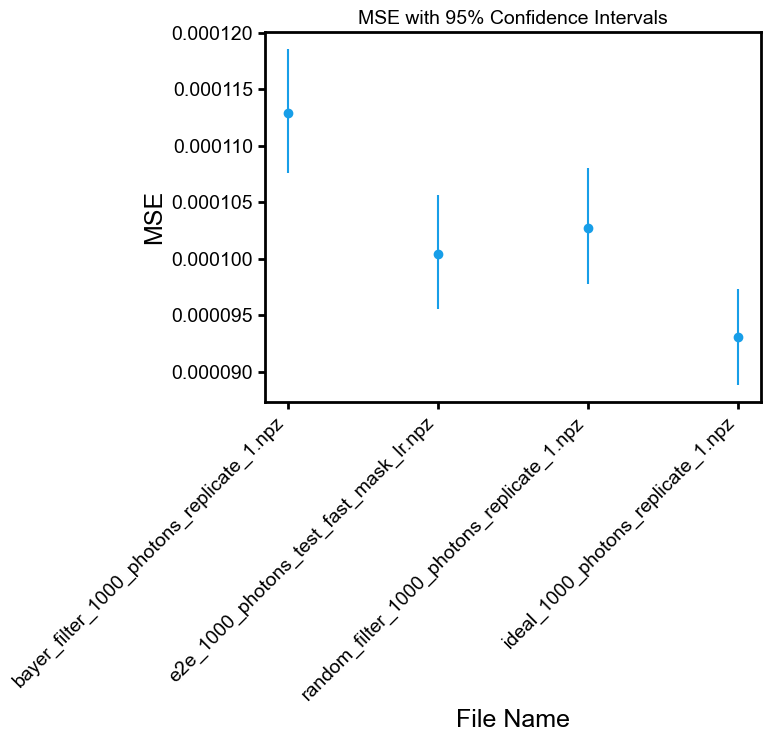

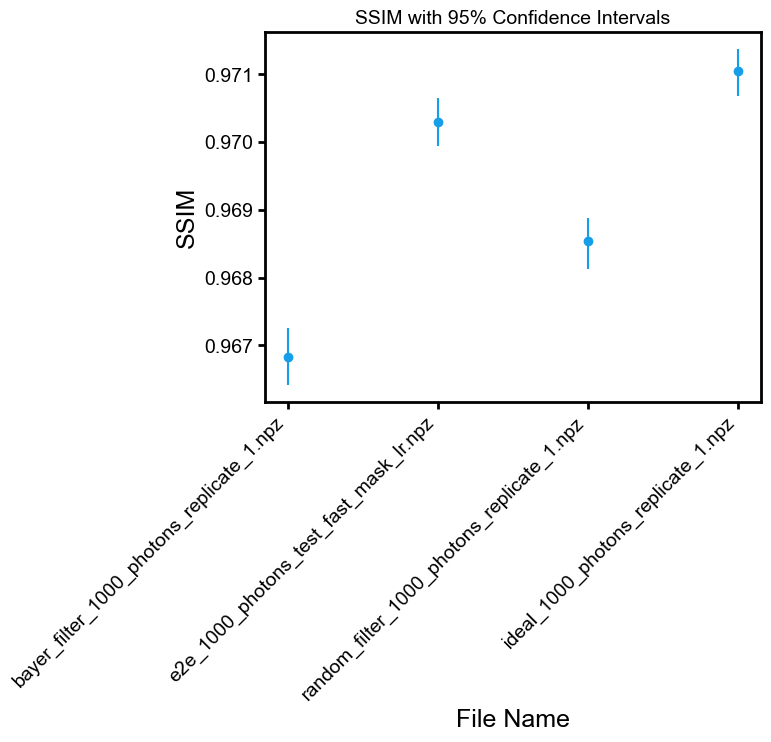

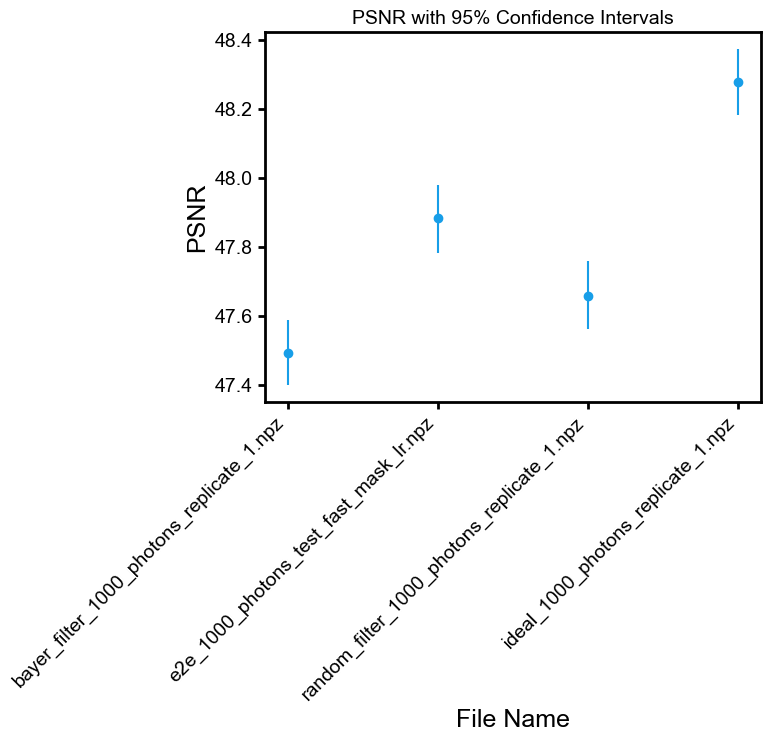

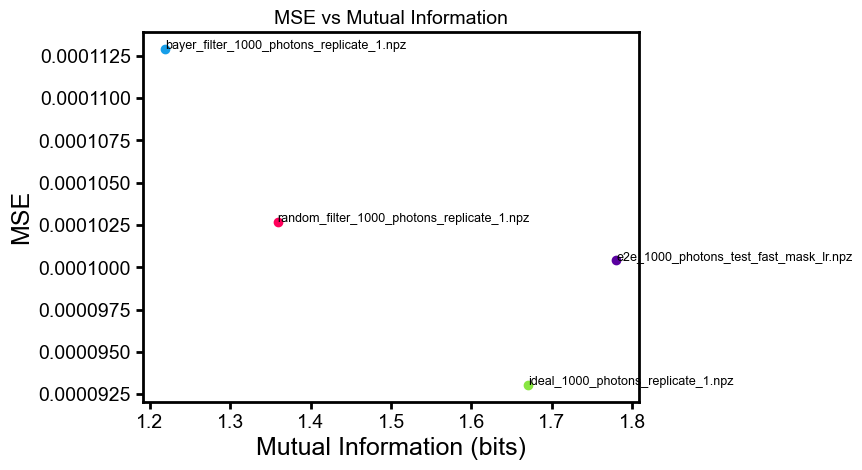

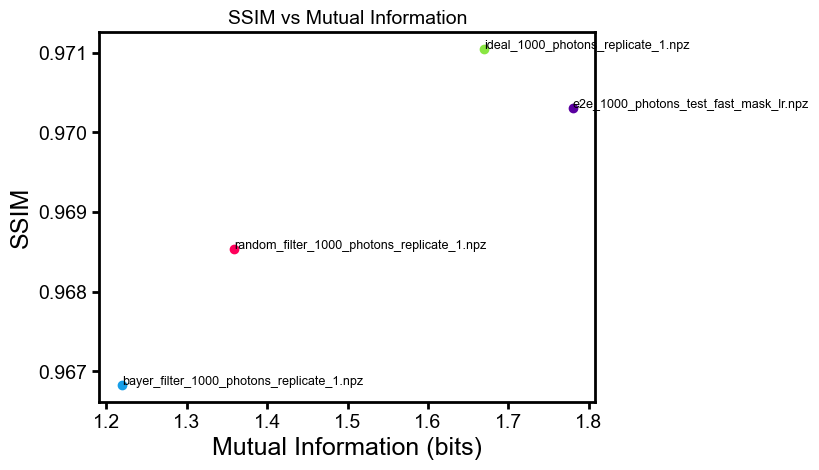

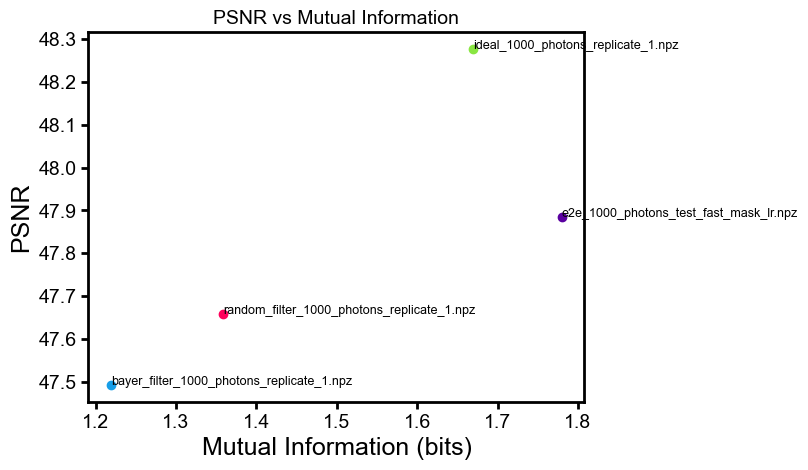

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# recon_result_files = glob.glob('/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/*.npz')
recon_result_files = ['/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/bayer_filter_1000_photons_replicate_1.npz',
                      '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/e2e_1000_photons_test_fast_mask_lr.npz',
                      '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/random_filter_1000_photons_replicate_1.npz',
                      '/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/ideal_1000_photons_replicate_1.npz'
                      ]
# recon_result_files.sort()

mse_means, mse_lowers, mse_uppers = [], [], []
ssim_means, ssim_lowers, ssim_uppers = [], [], []
psnr_means, psnr_lowers, psnr_uppers = [], [], []

# Assuming mutual_informations, lower_bounds, and upper_bounds are already defined in the cell above
# mutual_informations = [...]
# lower_bounds = [...]
# upper_bounds = [...]

for file in recon_result_files:
    result = np.load(file)

    mse_values = np.array(result['patch_list_mse'])
    ssim_values = np.array(result['patch_list_ssim'])
    psnr_values = np.array(result['patch_list_psnr'])
    # replace inf psnr values with 100
    psnr_values[np.isinf(psnr_values)] = 100

    # calculate the confidence interval of the mean by sampling with replacement
    def bootstrap_confidence_interval(data, num_samples=100, confidence_level=0.95):
        means = []
        n = len(data)
        for _ in range(num_samples):
            sample = np.random.choice(data, size=n, replace=True)
            means.append(np.mean(sample))
        lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
        upper_bound = np.percentile(means, (1 + confidence_level) / 2 * 100)
        return np.mean(data), lower_bound, upper_bound

    num_samples = 1000
    mse_mean, mse_lower, mse_upper = bootstrap_confidence_interval(mse_values, num_samples=num_samples)
    ssim_mean, ssim_lower, ssim_upper = bootstrap_confidence_interval(ssim_values, num_samples=num_samples)
    psnr_mean, psnr_lower, psnr_upper = bootstrap_confidence_interval(psnr_values, num_samples=num_samples)

    mse_means.append(mse_mean)
    mse_lowers.append(mse_lower)
    mse_uppers.append(mse_upper)
    ssim_means.append(ssim_mean)
    ssim_lowers.append(ssim_lower)
    ssim_uppers.append(ssim_upper)
    psnr_means.append(psnr_mean)
    psnr_lowers.append(psnr_lower)
    psnr_uppers.append(psnr_upper)

    print(f"Results for {file}:")
    print(f"MSE: {mse_mean:.4f} (95% CI: {mse_lower:.4f} - {mse_upper:.4f})")
    print(f"SSIM: {ssim_mean:.4f} (95% CI: {ssim_lower:.4f} - {ssim_upper:.4f})")
    print(f"PSNR: {psnr_mean:.4f} (95% CI: {psnr_lower:.4f} - {psnr_upper:.4f})")

# Plot MSE with confidence intervals
plt.figure()
plt.errorbar(range(len(mse_means)), mse_means, yerr=[np.array(mse_means) - np.array(mse_lowers), np.array(mse_uppers) - np.array(mse_means)], fmt='o')
plt.xticks(range(len(recon_result_files)), [file.split('/')[-1] for file in recon_result_files], rotation=45, ha='right')
plt.xlabel('File Name')
plt.ylabel('MSE')
plt.title('MSE with 95% Confidence Intervals')
plt.show()

# Plot SSIM with confidence intervals
plt.figure()
plt.errorbar(range(len(ssim_means)), ssim_means, yerr=[np.array(ssim_means) - np.array(ssim_lowers), np.array(ssim_uppers) - np.array(ssim_means)], fmt='o')
plt.xticks(range(len(recon_result_files)), [file.split('/')[-1] for file in recon_result_files], rotation=45, ha='right')
plt.xlabel('File Name')
plt.ylabel('SSIM')
plt.title('SSIM with 95% Confidence Intervals')
plt.show()

# Plot PSNR with confidence intervals
plt.figure()
plt.errorbar(range(len(psnr_means)), psnr_means, yerr=[np.array(psnr_means) - np.array(psnr_lowers), np.array(psnr_uppers) - np.array(psnr_means)], fmt='o')
plt.xticks(range(len(recon_result_files)), [file.split('/')[-1] for file in recon_result_files], rotation=45, ha='right')
plt.xlabel('File Name')
plt.ylabel('PSNR')
plt.title('PSNR with 95% Confidence Intervals')
plt.show()

# Plot MSE vs Mutual Information
plt.figure()
for i, (mi, mse) in enumerate(zip(mutual_informations, mse_means)):
    plt.scatter(mi, mse)
    plt.text(mi, mse, recon_result_files[i].split('/')[-1], fontsize=9)
plt.xlabel('Mutual Information (bits)')
plt.ylabel('MSE')
plt.title('MSE vs Mutual Information')
plt.show()

# Plot SSIM vs Mutual Information
plt.figure()
for i, (mi, ssim) in enumerate(zip(mutual_informations, ssim_means)):
    plt.scatter(mi, ssim)
    plt.text(mi, ssim, recon_result_files[i].split('/')[-1], fontsize=9)
plt.xlabel('Mutual Information (bits)')
plt.ylabel('SSIM')
plt.title('SSIM vs Mutual Information')
plt.show()

# Plot PSNR vs Mutual Information
plt.figure()
for i, (mi, psnr) in enumerate(zip(mutual_informations, psnr_means)):
    plt.scatter(mi, psnr)
    plt.text(mi, psnr, recon_result_files[i].split('/')[-1], fontsize=9)
plt.xlabel('Mutual Information (bits)')
plt.ylabel('PSNR')
plt.title('PSNR vs Mutual Information')
plt.show()


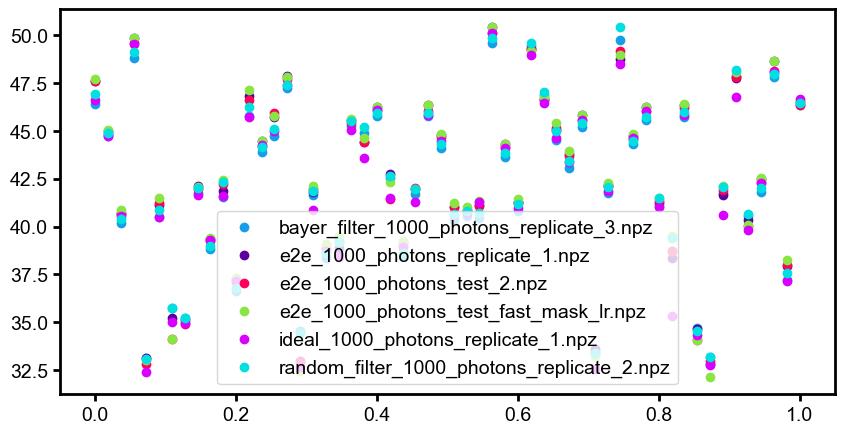

In [12]:

recon_result_files = glob.glob('/home/emarkley/Workspace/PYTHON/EncodingInformation/color_filter_array/recon_results/*.npz')
recon_result_files.sort()

plt.figure(figsize=(10, 5))
for file in recon_result_files:
    result = np.load(file)

    mse_values = np.array(result['image_list_mse'])
    ssim_values = np.array(result['image_list_ssim'])
    psnr_values = np.array(result['image_list_psnr'])
    plt.scatter(np.linspace(0, 1, len(psnr_values)), psnr_values, label=file.split('/')[-1])
plt.legend()
plt.show()
